In [2]:
%load_ext autoreload 
%autoreload 2
import sys
sys.path.insert(0, 'C:/Users/nlab/Documents/GitHub/obstacle_avoidance')
import warnings
warnings.filterwarnings('ignore')


from pipeline.obstacle_avoidance_processing import AvoidanceProcessing


import cv2
import json, os, cv2
from pathlib import Path
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import xarray as xr
import seaborn as sns
import h5py as hf
from tqdm import tqdm
from tqdm import tqdm
import itertools 
from scipy.interpolate import interp1d
from scipy import signal
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors
import os, fnmatch

In [21]:

# metadata json path
metadata_path = r'D:\obstacle_avoidance\metadata\J20RT.json'

#C:\Users\nlab\Desktop\mike_bonsai\recordings\metadata
# task name
# 'oa' for object avoidance
# 'gd' for gap detection
task_name = 'oa'

session = AvoidanceProcessing(metadata_path, task=task_name) 
session.change_dlc_project(r'D:\obstacle_avoidance\deeplabcut\obstacle_avoidance_100522-mike-2022-10-05\config.yaml')
#session.dlc_project
#session.preprocess()
session.process()

0it [00:00, ?it/s]

J20RT D:/obstacle_avoidance/recordings 101222
['D:/obstacle_avoidance/recordings\\101222\\J20RT\\oa\\101222_J20RT_control_Rig2_oa_top1DLC_resnet50_object_avoidanceoct22shuffle1_1952000.h5']
D:/obstacle_avoidance/recordings\101222\J20RT\oa
D:/obstacle_avoidance/recordings/101222/J20RT/oa
101222_J20RT_control_Rig2_oa D:/obstacle_avoidance/recordings/101222/J20RT/oa
hey
45
df made
pxl
arena_median
smoothing
saving101222_J20RT_control_Rig2_oaraw
saving101222_J20RT_control_Rig2_oa processed


1it [00:06,  6.36s/it]

J20RT D:/obstacle_avoidance/recordings 101322
['D:/obstacle_avoidance/recordings\\101322\\J20RT\\oa\\101322_J20RT_control_Rig2_oa_top1DLC_resnet50_object_avoidanceoct22shuffle1_1952000.h5']
D:/obstacle_avoidance/recordings\101322\J20RT\oa
D:/obstacle_avoidance/recordings/101322/J20RT/oa
101322_J20RT_control_Rig2_oa D:/obstacle_avoidance/recordings/101322/J20RT/oa
hey
48


2it [00:10,  5.20s/it]

df made
pxl
J20RT D:/obstacle_avoidance/recordings 101422
['D:/obstacle_avoidance/recordings\\101422\\J20RT\\oa\\101422_J20RT_control_Rig2_oa_top1DLC_resnet50_object_avoidanceoct22shuffle1_1952000.h5']
D:/obstacle_avoidance/recordings\101422\J20RT\oa
D:/obstacle_avoidance/recordings/101422/J20RT/oa
101422_J20RT_control_Rig2_oa D:/obstacle_avoidance/recordings/101422/J20RT/oa
hey
44
df made
pxl
arena_median
smoothing
saving101422_J20RT_control_Rig2_oaraw
saving101422_J20RT_control_Rig2_oa processed


3it [00:16,  5.53s/it]


In [60]:
df = pd.read_hdf(r"D:\obstacle_avoidance\recordings\021523\J620LT\oa\processed_J620LT_021523_oa.h5")

df1 = pd.read_hdf(r"D:\obstacle_avoidance\recordings\101422\J20RT\oa\processed_J20RT_101422_oa.h5")

In [61]:
len(df)

81

In [66]:
df1

,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,rightear_x,rightear_y,...,gt_obstacleTR_x_cm,gt_obstacleTR_y_cm,gt_obstacleBR_x_cm,gt_obstacleBR_y_cm,gt_obstacleBL_x_cm,gt_obstacleBL_y_cm,gt_obstacle_cen_x,gt_obstacle_cen_x_cm,gt_obstacle_cen_y,gt_obstacle_cen_y_cm
0,55589.910694,55592.573363,"[55589.92567, 55589.942336, 55589.959385, 5558...","[172, 173, 174, 175, 176, 177, 178, 179, 180, ...","[114.41011047363281, 114.04931640625, 114.4567...","[260.6685485839844, 260.719970703125, 261.2198...","[123.68523406982422, 123.43992614746094, 123.7...","[269.0312805175781, 269.5124816894531, 270.452...","[131.97830200195312, 131.4231414794922, 131.82...","[261.0414123535156, 261.03546142578125, 261.78...",...,38.677784,20.018264,38.765052,35.037574,33.800228,34.878452,336.128418,36.282243,255.037132,27.529119
1,55592.573363,55596.043072,"[55592.576448, 55592.593356, 55592.610688, 555...","[[331, 332, 333, 334, 335, 336, 337, 338, 339,...","[569.9376220703125, 569.89990234375, 570.15112...","[257.7106628417969, 258.29327392578125, 258.35...","[563.468017578125, 563.1435546875, 562.9865722...","[246.4767303466797, 247.0903778076172, 247.316...","[553.7902221679688, 553.5784301757812, 553.438...","[252.8640899658203, 253.6081085205078, 254.148...",...,30.130197,24.737972,30.575684,39.786175,25.893802,39.736608,259.575554,28.019004,299.623463,32.341839
2,55596.043072,55598.701414,"[55596.044403, 55596.06126, 55596.077772, 5559...","[539, 540, 541, 542, 543, 544, 545, 546, 547, ...","[112.23361206054688, 112.13844299316406, 112.0...","[261.6628723144531, 261.36572265625, 260.97338...","[121.4961929321289, 121.59054565429688, 121.19...","[271.4989013671875, 270.8448486328125, 270.242...","[128.702880859375, 128.755615234375, 128.40802...","[260.15728759765625, 259.86090087890625, 259.4...",...,30.168694,24.990030,30.572989,39.766256,25.885151,39.715686,259.333912,27.992920,300.533760,32.440098
3,55598.701414,55602.859289,"[55598.712051, 55598.728985, 55598.74574, 5559...","[[699, 700, 701, 702, 703, 704, 705, 706, 707,...","[570.4071044921875, 570.4484252929688, 570.541...","[259.1560363769531, 259.2869873046875, 259.161...","[559.2915649414062, 559.7265014648438, 559.967...","[249.8021240234375, 250.12881469726562, 249.27...","[556.2125854492188, 556.3768310546875, 556.267...","[261.6835632324219, 261.7645263671875, 260.677...",...,30.237888,13.621044,30.258299,28.530656,25.995433,28.380899,259.372784,27.997116,194.922327,21.040230
4,55602.859289,55606.255180,"[55602.863436, 55602.880179, 55602.896896, 556...","[948, 949, 950, 951, 952, 953, 954, 955, 956, ...","[112.10982513427734, 112.4399185180664, 112.60...","[262.7378234863281, 262.8009338378906, 262.942...","[121.96884155273438, 122.15755462646484, 121.8...","[272.2489929199219, 272.2918701171875, 272.408...","[128.989501953125, 129.34756469726562, 129.507...","[262.3678283691406, 263.1534423828125, 263.573...",...,40.241218,18.691827,40.859118,33.835161,36.038910,33.851271,353.563591,38.164224,243.783646,26.314400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,55875.372928,55878.572134,"[55875.3744, 55875.391129, 55875.407769, 55875...","[[17293, 17294, 17295, 17296, 17297, 17298, 17...","[574.5802612304688, 574.6004028320312, 574.850...","[259.66888427734375, 260.8497314453125, 260.63...","[558.9445190429688, 560.0055541992188, 560.443...","[255.07994079589844, 254.74929809570312, 254.0...","[560.1602783203125, 559.9780883789062, 560.029...","[268.2518615722656, 268.22052001953125, 267.67...",...,51.673765,14.136937,52.020685,28.793664,47.176949,28.649297,458.254524,49.464732,197.912462,21.362990
80,55878.572134,55881.496921,"[55878.575347, 55878.59232, 55878.609164, 5587...","[17485, 17486, 17487, 17488, 17489, 17490, 174...","[113.35865783691406, 113.92428588867188, 114.0...","[262.1263732910156, 261.5000305175781, 261.468...","[124.12394714355469, 124.72077178955078, 124.7...","[270.9346313

In [76]:
labels.dtype

dtype('int32')

In [75]:

        df = df[df['gt_obstacle_cen_x_cm'].notna()]


        kmeans_input = np.vstack([df['gt_obstacle_cen_x_cm'].values, df['gt_obstacle_cen_y_cm'].values])

        kmeans_input = np.transpose(kmeans_input)

        labels = KMeans(n_clusters=9).fit(kmeans_input).labels_
        df['obstacle_cluster'] = labels

        #get mean of obstacle center
        for clusters, cluster_name in enumerate(df['obstacle_cluster'].unique()):
            x=df.loc[df['obstacle_cluster']==cluster_name]
            mean_cenx = np.nanmean(x['gt_obstacle_cen_x_cm'])
            mean_ceny = np.nanmean(x['gt_obstacle_cen_y_cm'])
  
            for ind,row in df.iterrows(): 
                if row['obstacle_cluster'] == cluster_name:
                    df.at[ind,'mean_gt_obstacle_cen_x_cm'] = mean_cenx
                    df.at[ind,'mean_gt_obstacle_cen_y_cm'] = mean_ceny
        #label cluster by position 
        df['cluster_label'] = np.nan
        for clusters, cluster_name in enumerate(df['obstacle_cluster'].unique()):
            #label cluster by obstacle post
            x=df.loc[df['obstacle_cluster']==cluster_name]
            for ind,row in x.iterrows():
                # position top left label 0
                if 26.511267901536936 <= x['mean_gt_obstacle_cen_x_cm'].unique() <= 29.262555270323688 and 19.603003146893094 <= x['mean_gt_obstacle_cen_y_cm'].unique() <= 21.48005617413041:
                    df.at[ind,'cluster_label'] = 0
                # postion top middle lable 1     
                if 34.224618031842425  <= x['mean_gt_obstacle_cen_x_cm'].unique() <= 40.737819614353576  and 19.171765596431882  <= x['mean_gt_obstacle_cen_y_cm'].unique() <= 21.765871122032685:
                    df.at[ind,'cluster_label'] = 1
                # postion top middle lable 2     
                if 47.10153827545068   <= x['mean_gt_obstacle_cen_x_cm'].unique() <= 51.15598067362944  and 19.386902039003104  <= x['mean_gt_obstacle_cen_y_cm'].unique() <= 21.36299006442639:
                    df.at[ind,'cluster_label'] = 2
                # postion top middle lable 3     
                if 24.622638543067332    <= x['mean_gt_obstacle_cen_x_cm'].unique() <= 30.32366857885396   and 24.072987056842724  <= x['mean_gt_obstacle_cen_y_cm'].unique() <= 28.06565031743722:
                    df.at[ind,'cluster_label'] = 3 
                # postion top middle lable 4     
                if 34.33696422611072     <= x['mean_gt_obstacle_cen_x_cm'].unique() <= 39.16315460138148   and 23.33051936216178  <= x['mean_gt_obstacle_cen_y_cm'].unique() <= 28.21568031983405:
                    df.at[ind,'cluster_label'] = 4
                # postion top middle lable 5     
                if 46.78662583258851     <= x['mean_gt_obstacle_cen_x_cm'].unique() <= 51.45490492362184   and 23.30309610363196  <= x['mean_gt_obstacle_cen_y_cm'].unique() <= 26.340749658133035:
                    df.at[ind,'cluster_label'] = 5
                # postion top middle lable 6     
                if 23.672283873362495      <= x['mean_gt_obstacle_cen_x_cm'].unique() <= 29.24383212681531  and 31.13010098995012  <= x['mean_gt_obstacle_cen_y_cm'].unique() <= 32.9010213861951:
                    df.at[ind,'cluster_label'] = 6
                # postion top middle lable 7     
                if 34.99528058841633      <= x['mean_gt_obstacle_cen_x_cm'].unique() <= 38.68741237003255   and 30.937326612118863  <= x['mean_gt_obstacle_cen_y_cm'].unique() <= 32.92257553927523:
                    df.at[ind,'cluster_label'] = 7
                # postion top middle lable 8     
                if 47.0371762841755 <= x['mean_gt_obstacle_cen_x_cm'].unique() <= 52.09703145249776    and 30.463949607263373  <= x['mean_gt_obstacle_cen_y_cm'].unique() <= 32.749148951731954:
                    df.at[ind,'cluster_label'] = 8
        df['cluster_label'] = df['cluster_label'].astype('int')



IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [70]:
df['gt_obstacle_cen_x_cm'].isna().sum()

1

nan


(0.0, 72.0)

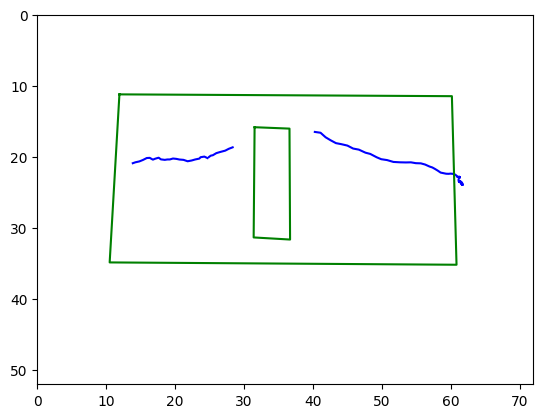

In [29]:
print(df.at[0,'odd'])
plt.plot(df.at[0,'ts_nose_x_cm'],df.at[0,'ts_nose_y_cm'],c ='b')

#plt.plot(df.at[1158,'interp_ts_nose_x_cm'],df.at[1158,'interp_ts_nose_y_cm'],c = 'r')

plt.plot([df.at[0,'mean_arenaTL_x_cm'], df.at[0,'mean_arenaTR_x_cm'], df.at[0,'mean_arenaBR_x_cm'], df.at[0,'mean_arenaBL_x_cm'],df.at[0,'mean_arenaTL_x_cm']],
            [df.at[0,'mean_arenaTL_y_cm'], df.at[0,'mean_arenaTR_y_cm'], df.at[0,'mean_arenaBR_y_cm'], df.at[0,'mean_arenaBL_y_cm'],df.at[0,'mean_arenaTL_y_cm']],color='green')

plt.plot([df.at[0,'gt_obstacleTL_x_cm'], df.at[0,'gt_obstacleTR_x_cm'], df.at[0,'gt_obstacleBR_x_cm'], df.at[0,'gt_obstacleBL_x_cm'],df.at[0,'gt_obstacleTL_x_cm']],
            [df.at[0,'gt_obstacleTL_y_cm'], df.at[0,'gt_obstacleTR_y_cm'], df.at[0,'gt_obstacleBR_y_cm'], df.at[0,'gt_obstacleBL_y_cm'],df.at[0,'gt_obstacleTL_y_cm']],color='green')

plt.ylim([52,0]); plt.xlim([0, 72])

In [15]:
 dist_to_posts = np.median(df['arenaTR_x'].iloc[0],0) - np.median(df['arenaTL_x'].iloc[0],0)

AxisError: axis 0 is out of bounds for array of dimension 0

In [64]:
df['obstacleBL_x_cm'].isnull().sum()

0

In [58]:
df.at[4,'obstacleBR_x_cm']

array([44.43312825578971, 44.450754302039556, 44.434214531170234,
       44.42704729712687, 44.39978942721401, 44.42532781599689,
       44.40460670371308, 44.39821187151064, 44.42511765719211,
       44.42256299951329, 44.36293248565968, 44.41587885778738,
       44.43395524433318, 44.43985060820739, 44.42595829241121,
       44.43764803475994, 44.43287715695803, 44.44163559338042,
       44.43488321827634, 44.43255782474818, 44.39680080525,
       44.436943866297185, 44.442416183226726, 44.406454463594024,
       44.43124774388724, 44.412884777153124, 44.41728719471289,
       44.439782374829214, 44.444274860448175, 44.436608158076574,
       44.41979272435943, 44.42906700512081, 44.40644081691839,
       44.416386514121, 44.42437527803758, 44.43710216773455,
       44.40548282028883, 44.41025369809074, 44.435819380224885,
       44.41908309722643, 44.44150458529432, 44.41576149637692,
       44.447509122573614, 44.448704571359215, 44.441755684126,
       44.435300806550764, 44.36158

In [56]:
 for ind, row in df.iterrows():
    xvals_cm = np.stack([row['gt_obstacleTL_x_cm'], row['gt_obstacleTR_x_cm'], row['gt_obstacleBL_x_cm'], row['gt_obstacleBR_x_cm']])
    df.at[ind,'gt_obstacle_cen_x_cm' ] = np.mean(xvals_cm)
 

In [53]:
xvals_cm

array([40.0644289 , 44.98841968, 40.03101365, 44.970679  ])

In [ ]:
 for ind, row in self.data.iterrows():
  
            xvals = np.stack([row['gt_obstacleTL_x'], row['gt_obstacleTR_x'], row['gt_obstacleBL_x'], row['gt_obstacleBR_x']])
            xvals_cm = np.stack([row['gt_obstacleTL_x_cm'], row['gt_obstacleTR_x_cm'], row['gt_obstacleBL_x_cm'], row['gt_obstacleBR_x_cm']])
            self.data.at[ind,'gt_obstacle_cen_x' ] = np.mean(xvals)
            self.data.at[ind,'gt_obstacle_cen_x_cm' ] = np.mean(xvals_cm)

            yvals = np.stack([row['gt_obstacleTL_y'], row['gt_obstacleTR_y'], row['gt_obstacleBL_y'], row['gt_obstacleBR_y']])
            yvals_cm = np.stack([row['gt_obstacleTL_y_cm'], row['gt_obstacleTR_y_cm'], row['gt_obstacleBL_y_cm'], row['gt_obstacleBR_y_cm']])
            self.data.at[ind,'gt_obstacle_cen_y' ] = np.mean(yvals)
            self.data.at[ind,'gt_obstacle_cen_y_cm' ] = np.mean(yvals_cm)

In [ ]:
mean_gt_obstacle_cen_x_cm

In [5]:
for ind, row in df.iterrows(): 
            if row['odd'] == True:
                nose_list = row['nose_x_cm'] 
                odd_ind = np.argmax(nose_list>16)
                for key in keys_list:
                    df.at[ind,'ts_' + key] = row[key][odd_ind:]
                #use odd_ind to index into obstacle 
                # iterate over columns list  

                #create gt_obstacle points
            else: 
                nose_list = row['nose_x_cm']
                even_ind = np.argmax(nose_list<56)
                for key in keys_list:
                    df.at[ind,'ts_' + key] = row[key][even_ind:]

KeyError: 'odd'

In [26]:
for ind,row in df.iterrows():
    if row['nose_x_cm'][0] <= 20:
        df.at[ind,'odd'] = True 
    elif row['nose_x_cm'][0] >=20:
        df.at[ind,'odd'] = False

TypeError: 'float' object is not subscriptable

In [35]:

np.mean(df.at[33,'nose_x_cm'][:10])

61.38620010830393

In [29]:
ind

67